In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('test.csv')
test.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data=train.append(test)
data.shape

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(1309, 12)

In [5]:
passenger_id=test['PassengerId']

In [6]:

train.set_index(['PassengerId'],inplace=True)
train.head()
test.set_index(['PassengerId'],inplace=True)
test.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [9]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

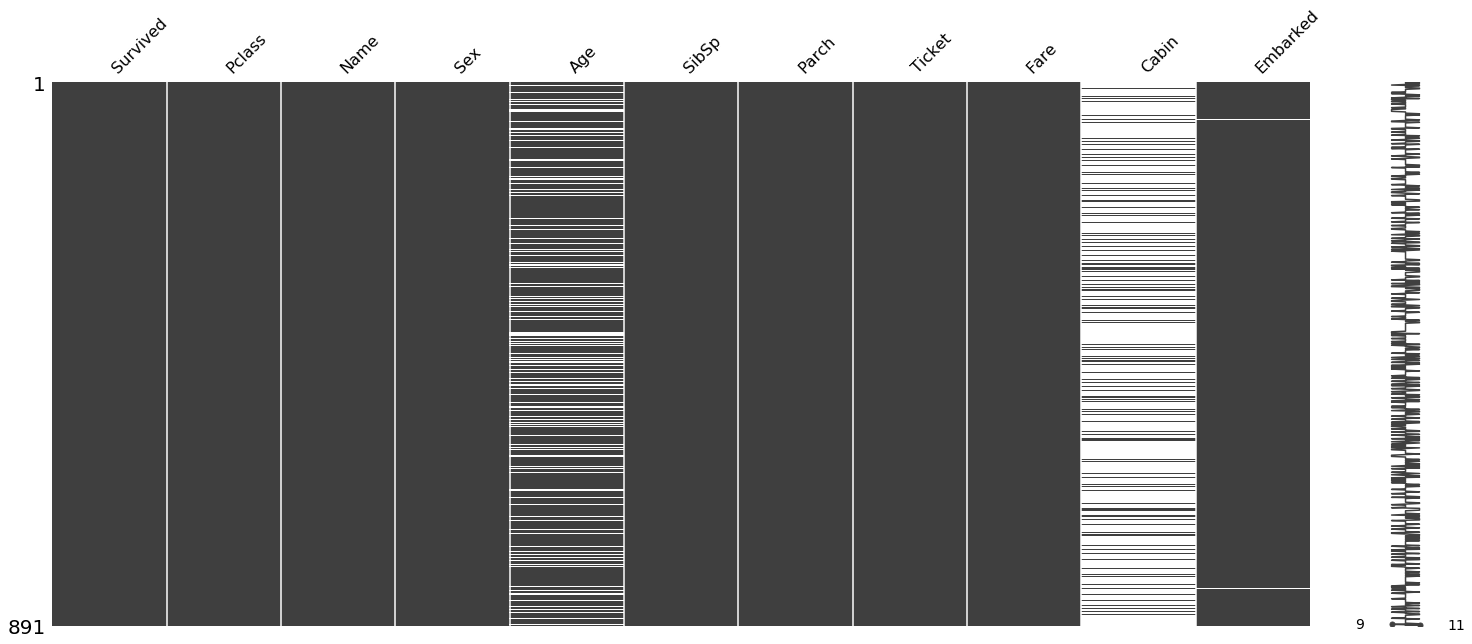

In [10]:

import missingno as mn
mn.matrix(train)

In [11]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='median')
Age2=len(train['Age'])
Age2=imp.fit_transform(train['Age'].values.reshape(1,-1))
Age2=Age2.T

train['Age2']=train['Age']


train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [12]:
Age_test=len(test['Age'])
Age_test=imp.fit_transform(test['Age'].values.reshape(1,-1))
Age_test=Age_test.T

test['Age_test']=test['Age']
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [13]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age2        177
dtype: int64

In [14]:
train.Embarked.value_counts()
train.Embarked.fillna('S',inplace=True)
train.Age2.fillna(train.Age2.mean(),inplace=True)

train.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Age2          0
dtype: int64

In [15]:
test.Fare.fillna(test.Fare.mean(),inplace=True)
test.Age_test.fillna(test.Age_test.mean(),inplace=True)
test.isnull().sum()


Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
Age_test      0
dtype: int64

In [16]:
train.drop(['Age','Cabin'],axis=1,inplace=True)
test.drop(['Age','Cabin'],axis=1,inplace=True)

In [17]:
test.isnull().sum()
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age2        0
dtype: int64

In [18]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [19]:
train['Sex']=train.Sex.apply(lambda x:0 if x=='female' else 1)


In [20]:
train.Sex

PassengerId
1      1
2      0
3      0
4      0
5      1
6      1
7      1
8      1
9      0
10     0
11     0
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     0
21     1
22     1
23     0
24     1
25     0
26     0
27     1
28     1
29     0
30     1
      ..
862    1
863    0
864    0
865    1
866    0
867    0
868    1
869    1
870    1
871    1
872    0
873    1
874    1
875    0
876    0
877    1
878    1
879    1
880    0
881    0
882    1
883    0
884    1
885    1
886    0
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

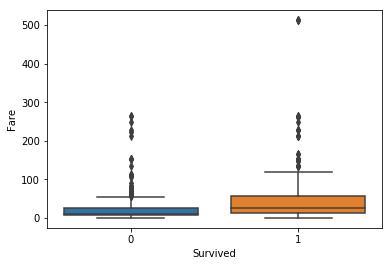

In [21]:
sns.boxplot(x='Survived',y='Fare',data=train)


In [22]:
train.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208,29.699118
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,13.002015
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,22.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,29.699118
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,35.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,80.000000


In [23]:
train.groupby('Survived').mean()

,Pclass,Sex,SibSp,Parch,Fare,Age2
Survived,,,,,,
0,2.531876,0.852459,0.553734,0.329690,22.117887,30.415100
1,1.950292,0.318713,0.473684,0.464912,48.395408,28.549778


In [24]:
train.groupby('Sex').mean()

,Survived,Pclass,SibSp,Parch,Fare,Age2
Sex,,,,,,
0,0.742038,2.159236,0.694268,0.649682,44.479818,28.216730
1,0.188908,2.389948,0.429809,0.235702,25.523893,30.505824


In [25]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age2
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,-0.069809
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,-0.331339
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.084153
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,-0.232625
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,-0.179191
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,0.091566
Age2,-0.069809,-0.331339,0.084153,-0.232625,-0.179191,0.091566,1.000000


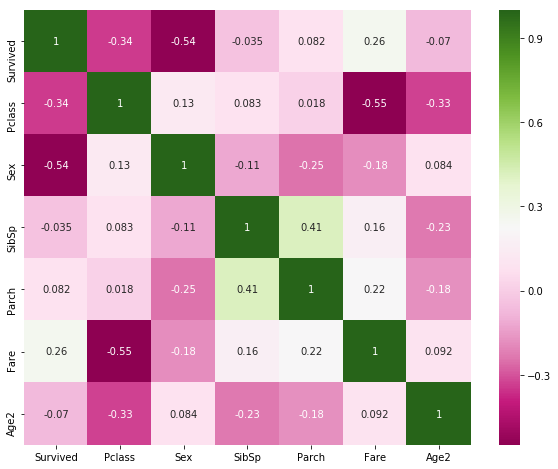

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,cmap='PiYG')

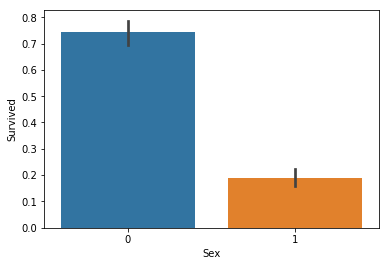

In [27]:
sns.barplot(x='Sex',y='Survived',data=train)

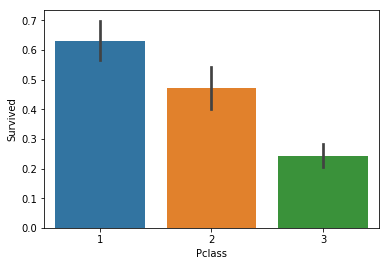

In [28]:
sns.barplot(x='Pclass',y='Survived',data=train)

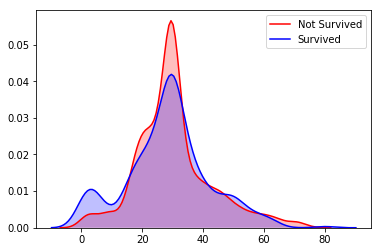

In [29]:
sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')

In [30]:
train['family_size']=train['SibSp']+train['Parch']+1
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0,2
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0,2
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0,1


In [31]:
def family_group(size):
    a=''
    if size<=1: 
        a='alone'
    elif size<=4:
        a='small'
    else:
        a='large'
    return a
train['family_group']=train.family_size.map(family_group)
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0,2,small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0,2,small
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0,1,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0,2,small
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0,1,alone


In [32]:
def age_group(age):
    a=''
    if age<=1: 
        a='infant'
    elif age<=4:
        a='toddler'
    elif age<=13:
        a='child'
    elif age<=19:
        a='teenager'
    elif age<=30:
        a='young adult'
    elif age<=40:
        a='adult'
    elif age<=55:
        a='middle aged'
    else:
        a='old'
    return a
train['age_group']=train.Age2.map(age_group)
train.age_group.value_counts()

young adult    422
adult          155
middle aged    110
teenager        93
old             40
child           31
toddler         26
infant          14
Name: age_group, dtype: int64

In [37]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group,age_group,fare_per_person,fare_group
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0,2,small,young adult,3.62500,very_low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0,2,small,adult,35.64165,high
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0,1,alone,young adult,7.92500,low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0,2,small,adult,26.55000,high
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0,1,alone,adult,8.05000,low


In [34]:
train['fare_per_person']=train['Fare']/train['family_size']
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group,age_group,fare_per_person
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0,2,small,young adult,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0,2,small,adult,35.64165
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0,1,alone,young adult,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0,2,small,adult,26.55000
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0,1,alone,adult,8.05000


In [35]:
def fare_group(fare):
    a=''
    if fare<=4:
        a='very_low'
    elif fare<=10:
        a='low'
    elif fare<=20:
        a='mid'
    elif fare<=45:
        a='high'
    else:
        a='very_high'
    return a
train['fare_group']=train.fare_per_person.map(fare_group)
train.fare_group.value_counts()

low          471
high         154
mid          153
very_high     72
very_low      41
Name: fare_group, dtype: int64

In [36]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group,age_group,fare_per_person,fare_group
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0,2,small,young adult,3.62500,very_low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0,2,small,adult,35.64165,high
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0,1,alone,young adult,7.92500,low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0,2,small,adult,26.55000,high
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0,1,alone,adult,8.05000,low


In [38]:
train=pd.get_dummies(train,columns=['Embarked','age_group','family_group','fare_group'],drop_first=True)

In [39]:
train.shape

(891, 26)

In [40]:
train.drop(['Name',"Ticket",'Fare','Age2','fare_per_person','family_size'],axis=1,inplace=True)

In [41]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,age_group_child,age_group_infant,age_group_middle aged,age_group_old,age_group_teenager,age_group_toddler,age_group_young adult,family_group_large,family_group_small,fare_group_low,fare_group_mid,fare_group_very_high,fare_group_very_low
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
